In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils
import functools
import tensorflow as tf
import numpy as np
import pandas as pd
from datetime import datetime
import math

Using TensorFlow backend.


In [2]:
df_kanji = pd.read_csv("all_kanji.csv",error_bad_lines=False)
print(df_kanji.shape)

IMAGE_SIZE = int(math.sqrt(df_kanji.shape[1]))
print(IMAGE_SIZE)

(234440, 901)
30


In [3]:
df_unicode_to_char = pd.read_csv("https://raw.githubusercontent.com/deannacodes/kuzushiji_recognition/master/unicode_translation.csv",error_bad_lines=False)
df_unicode_to_char = df_unicode_to_char.set_index('Unicode').T.to_dict('list')

In [4]:
char_counts = pd.DataFrame(df_kanji.groupby(['character']).size(), columns=["count"])
print(len(char_counts))
char_counts = char_counts.loc[char_counts["count"] > 0].to_dict()['count']
print(len(char_counts))
df_kanji = df_kanji.loc[df_kanji["character"].isin(char_counts)]

4050
4050


In [5]:
X = df_kanji.drop(columns=["character"])
y_b = df_kanji["character"]

In [6]:
unicode_to_int = {}
unicode_to_char = {}
count = 0
for unicode in y_b:
    if unicode not in unicode_to_int:
        unicode_to_int[unicode] = count
        if unicode in df_unicode_to_char:
            unicode_to_char[count] = df_unicode_to_char[unicode][0]    
        count += 1

In [7]:
print(unicode_to_char)
print(unicode_to_int)

{0: '工', 1: '三', 2: '己', 3: '世', 4: '細', 5: '人', 6: '強', 7: '俳', 8: '根', 9: '諧', 10: '子', 11: '及', 12: '者', 13: '避', 14: '正', 15: '文', 16: '時', 17: '思', 18: '浮', 19: '気', 20: '職', 21: '老', 22: '武', 23: '楽', 24: '盲', 25: '若', 26: '自', 27: '風', 28: '裏', 29: '畳', 30: '息', 31: '序', 32: '心', 33: '久', 34: '活', 35: '物', 36: '間', 37: '啁', 38: '足', 39: '名', 40: '類', 41: '付', 42: '居', 43: '茶', 44: '使', 45: '義', 46: '手', 47: '年', 48: '漬', 49: '醤', 50: '上', 51: '几', 52: '訛', 53: '始', 54: '何', 55: '地', 56: '十', 57: '故', 58: '町', 59: '是', 60: '住', 61: '片', 62: '理', 63: '言', 64: '仮', 65: '馬', 66: '嘘', 67: '先', 68: '条', 69: '天', 70: '次', 71: '数', 72: '門', 73: '案', 74: '書', 75: '字', 76: '食', 77: '其', 78: '第', 79: '事', 80: '違', 81: '八', 82: '部', 83: '百', 84: '同', 85: '然', 86: '梓', 87: '々', 88: '浅', 89: '満', 90: '林', 91: '弥', 92: '鋳', 93: '某', 94: '追', 95: '薮', 96: '交', 97: '屁', 98: '処', 99: '中', 100: '近', 101: '郎', 102: '我', 103: '▲', 104: '母', 105: '之', 106: '江', 107: '宝', 108: '木', 109: '後', 110: '司',

In [8]:
import math

y = y_b.map(unicode_to_int)  

drops = []
for i in y:
    if math.isnan(i):
        drops.append(i)

y = y.drop(drops)
X = X.drop(drops)
y = list(y)

X = X.to_numpy().astype('int')

value:  工


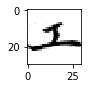

value:  三


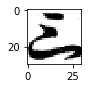

value:  己


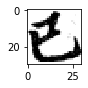

value:  世


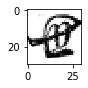

value:  細


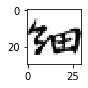

value:  人


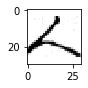

value:  強


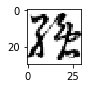

value:  俳


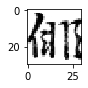

value:  根


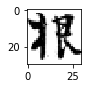

value:  諧


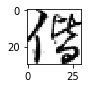

value:  子


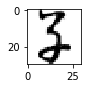

value:  及


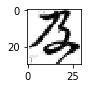

value:  者


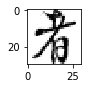

value:  避


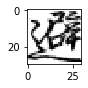

value:  正


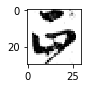

value:  文


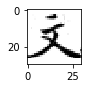

value:  時


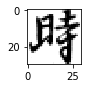

value:  思


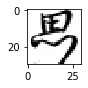

value:  浮


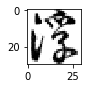

value:  気


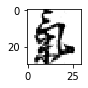

value:  職


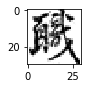

value:  老


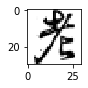

value:  武


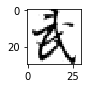

value:  楽


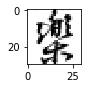

value:  盲


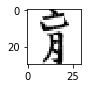

value:  若


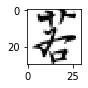

value:  自


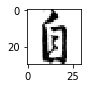

value:  風


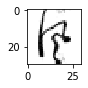

value:  裏


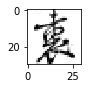

value:  畳


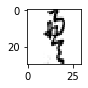

value:  息


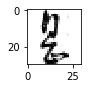

value:  序


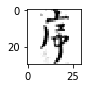

value:  心


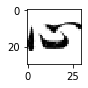

value:  久


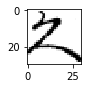

value:  活


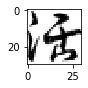

value:  物


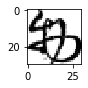

value:  間


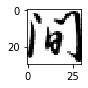

value:  思


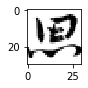

value:  啁


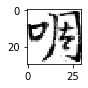

value:  人


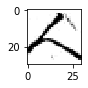

value:  物


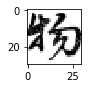

value:  足


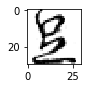

value:  名


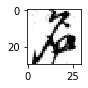

value:  類


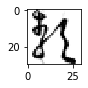

value:  付


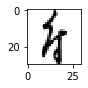

value:  居


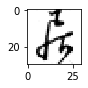

value:  茶


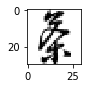

value:  使


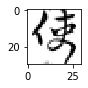

value:  義


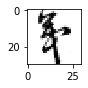

value:  手


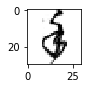

value:  年


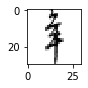

value:  漬


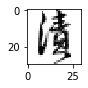

value:  醤


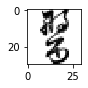

value:  上


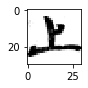

value:  几


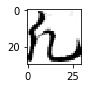

value:  訛


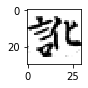

value:  始


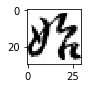

value:  何


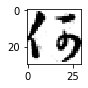

value:  地


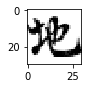

value:  十


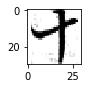

value:  故


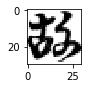

value:  付


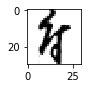

value:  町


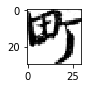

value:  是


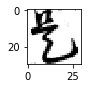

value:  住


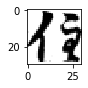

value:  片


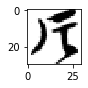

value:  理


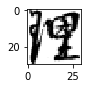

value:  言


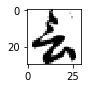

value:  仮


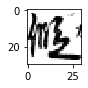

value:  馬


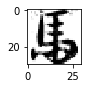

value:  嘘


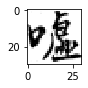

value:  物


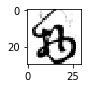

value:  先


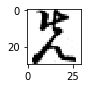

value:  条


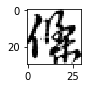

value:  天


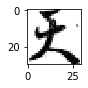

value:  次


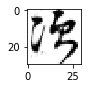

value:  数


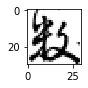

value:  門


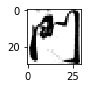

value:  案


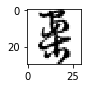

value:  書


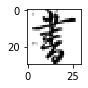

value:  名


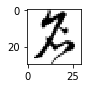

value:  字


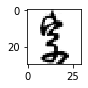

value:  食


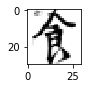

value:  食


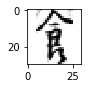

value:  食


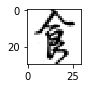

value:  其


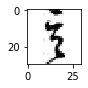

value:  第


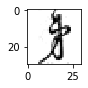

value:  事


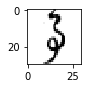

value:  違


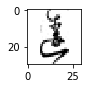

value:  事


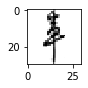

value:  八


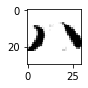

value:  己


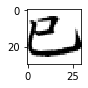

value:  部


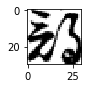

value:  百


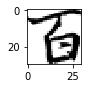

value:  同


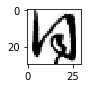

value:  然


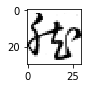

value:  嘘


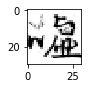

value:  梓


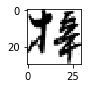

value:  々


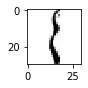

value:  浅


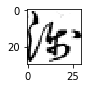

In [9]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

%matplotlib inline

for i in range(100):
    image = X[i].reshape(IMAGE_SIZE,IMAGE_SIZE)
    plt.figure(figsize=(1,1))
    plt.imshow(image, cmap=plt.cm.gray, interpolation='nearest')
    print("value: ", unicode_to_char[y[i]])
    plt.show()


In [10]:
from sklearn.model_selection import train_test_split

X = X.astype('float32')
X /= 255
y = np_utils.to_categorical(y, len(unicode_to_int))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=3)

In [11]:
model = Sequential()
input_size = IMAGE_SIZE*IMAGE_SIZE
hidden_neurons_1 = 680
out_size = len(unicode_to_int)

model.add(Dense(hidden_neurons_1, input_dim = input_size))
model.add(Activation('sigmoid')) 
# model.add(Dense(hidden_neurons_2, input_dim = hidden_neurons_1))
# model.add(Activation('sigmoid')) 
model.add(Dense(out_size, input_dim = hidden_neurons_1))
model.add(Activation('softmax'))

In [12]:
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

fitted_model = model.fit(X_train, y_train, validation_split=0.33, batch_size=32, epochs=30, verbose=1)

Train on 141367 samples, validate on 69629 samples
Epoch 1/30
141367/141367 [==============================] - 289s 2ms/step - loss: 4.5874 - accuracy: 0.2846 - val_loss: 3.4976 - val_accuracy: 0.4173
Epoch 2/30
141367/141367 [==============================] - 283s 2ms/step - loss: 2.9613 - accuracy: 0.4698 - val_loss: 2.9942 - val_accuracy: 0.4839
Epoch 3/30
141367/141367 [==============================] - 260s 2ms/step - loss: 2.4695 - accuracy: 0.5265 - val_loss: 2.7952 - val_accuracy: 0.5036
Epoch 4/30
141367/141367 [==============================] - 292s 2ms/step - loss: 2.1529 - accuracy: 0.5639 - val_loss: 2.7110 - val_accuracy: 0.5230
Epoch 5/30
141367/141367 [==============================] - 277s 2ms/step - loss: 1.9517 - accuracy: 0.5917 - val_loss: 2.6461 - val_accuracy: 0.5411
Epoch 6/30
141367/141367 [==============================] - 280s 2ms/step - loss: 1.7866 - accuracy: 0.6168 - val_loss: 2.6238 - val_accuracy: 0.5449
Epoch 7/30
141367/141367 [=======================

In [13]:
y_predict = model.predict(X_test, verbose=0)
score = model.evaluate(X_test, y_test, verbose=1)
print(score)

23444/23444 [==============================] - 6s 253us/step
[3.2378006925193996, 0.6020730137825012]


(0, 269, 647)
predicted:  野 actual:  那


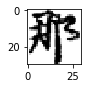

(1, 129, 594)
predicted:  又 actual:  召


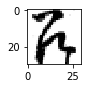

(2, 954, 1018)
predicted:  待 actual:  持


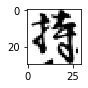

(5, 1792, 112)
predicted:  殺 actual:  巻


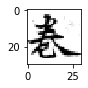

(6, 859, 2632)
predicted:  度 actual:  廃


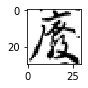

(7, 308, 868)
predicted:  仰 actual:  升


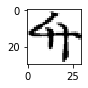

(8, 221, 102)
predicted:  頭 actual:  我


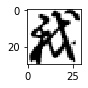

(11, 163, 165)
predicted:  有 actual:  色


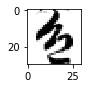

(13, 500, 213)
predicted:  島 actual:  在


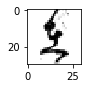

(14, 612, 2012)
predicted:  附 actual:  演


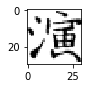

(19, 740, 147)
predicted:  対 actual:  出


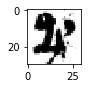

(24, 269, 145)
predicted:  野 actual:  也


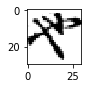

(26, 408, 851)
predicted:  減 actual:  試


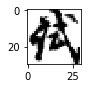

(27, 406, 2172)
predicted:  加 actual:  射


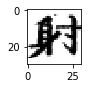

(28, 475, 393)
predicted:  氏 actual:  侭


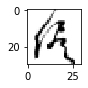

(30, 41, 622)
predicted:  付 actual:  相


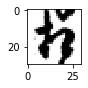

(31, 400, 1178)
predicted:  浄 actual:  帰


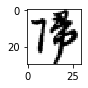

(33, 1020, 584)
predicted:  儀 actual:  状


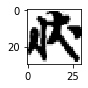

(34, 41, 962)
predicted:  付 actual:  懸


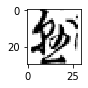

(35, 1043, 397)
predicted:  藤 actual:  並


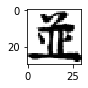

(36, 300, 367)
predicted:  分 actual:  金


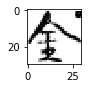

In [14]:
%matplotlib inline

mistakes = []
for i in range(len(y_predict)):
    max_p = 0
    max_a = 0
    for j in range(len(unicode_to_int)):
        if y_predict[i][max_p] < y_predict[i][j]:
            max_p = j
        if y_test[i][max_a] < y_test[i][j]:
            max_a = j
    if max_p != max_a:
        mistakes.append((i,max_p,max_a))
    if len(mistakes) > 20:
        break;

for m in mistakes:
    (mistake, predicted, actual) = m
    print(m)
    print("predicted: ", unicode_to_char[predicted], "actual: ", unicode_to_char[actual])
    image = X_test[mistake].reshape(IMAGE_SIZE,IMAGE_SIZE)
    plt.figure(figsize=(1,1))
    plt.imshow(image, cmap=plt.cm.gray, interpolation='nearest')
    plt.show()    
    j += 1


In [15]:
from sklearn import metrics

y_predict_p = model.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test.argmax(1), y_predict_p[:,1], pos_label=1)
AUC = metrics.auc(fpr, tpr)

print(AUC)

0.9974792756713142


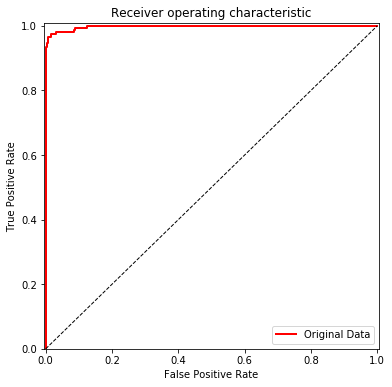

In [17]:
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='red', lw=2, label='Original Data')
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')

plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()